In [49]:
#import all required libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [2]:
#load the dataset
data=pd.read_csv('diabetes.csv')

In [3]:
#view first 5 records
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.shape

(768, 9)

In [5]:
# column name
for x in data:
    print(x)

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
Outcome


In [6]:
# dataset statistics
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
data.isnull().sum()      # to check any null value in dataset

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

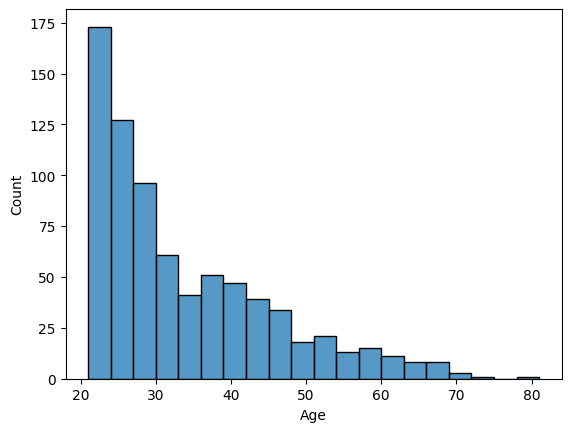

In [10]:
# visulaize with histrogram

sns.histplot(data['Age'],bins=20)
plt.show()

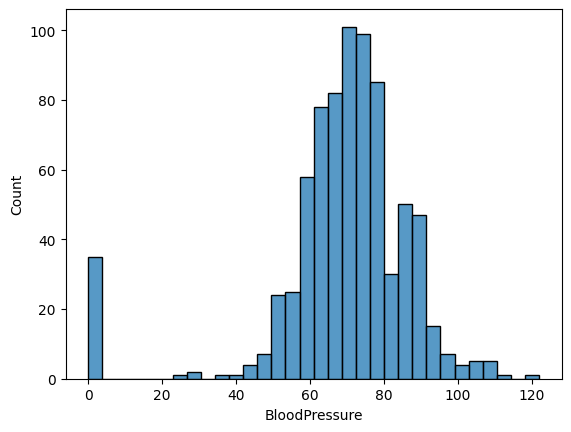

In [11]:
sns.histplot(data['BloodPressure'])
plt.show()

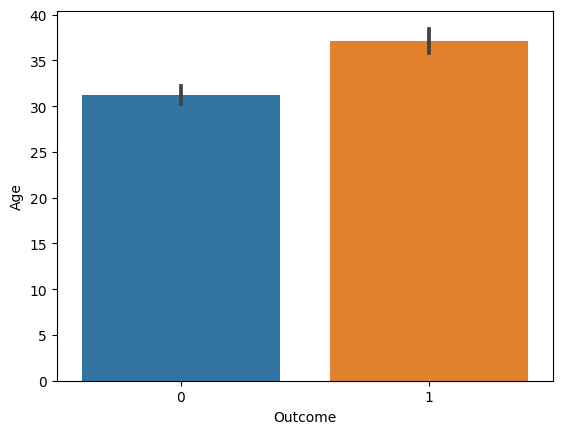

In [16]:
#plot the barplot -----> X - outcome is categorical column , y - is numerical column
sns.barplot(x='Outcome',y='Age', data=data)
plt.show()

In [17]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

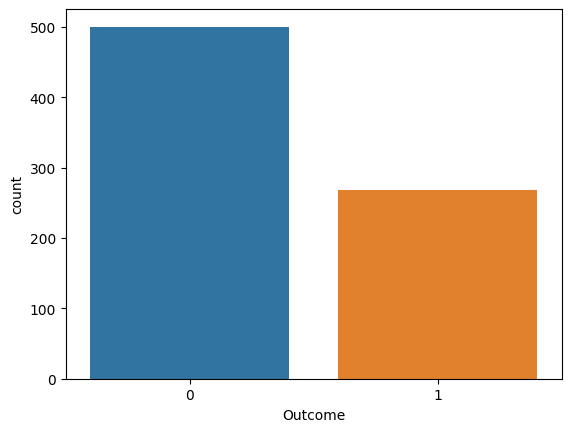

In [18]:
sns.countplot(x='Outcome',data=data)
plt.show()

In [19]:
#yes for 1 and 0 for no 

yes=data[data['Outcome']==1]
no= data[data['Outcome']==0]

In [20]:
yes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37,1
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1


In [21]:
yes.shape

(268, 9)

In [22]:
no.shape

(500, 9)

In [23]:
no_sample=no.sample(n=268)

In [24]:
no_sample.shape

(268, 9)

In [25]:
new_df= pd.concat([no_sample,yes],axis=0)

In [26]:
for i in new_df:
    print(i)

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
Outcome


In [27]:
new_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
582,12,121,78,17,0,26.5,0.259,62,0
224,1,100,66,15,56,23.6,0.666,26,0
718,1,108,60,46,178,35.5,0.415,24,0
21,8,99,84,0,0,35.4,0.388,50,0
703,2,129,0,0,0,38.5,0.304,41,0


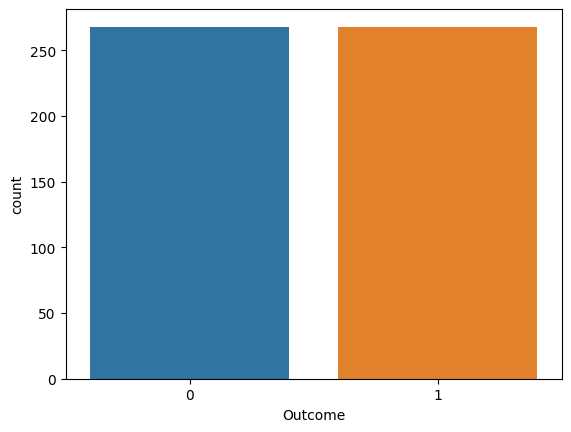

In [28]:
sns.countplot(x='Outcome',data=new_df)
plt.show()

In [29]:
# now make a model 

x=new_df.drop(columns='Outcome')         # independent variable
y=new_df['Outcome']                      # dependent variable

In [30]:
# now split the dataset into training or testing set

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=44)

# Logistic Regression

In [31]:
model=LogisticRegression()

In [32]:
model.fit(x_train,y_train) # set the model with training set

C:\Users\Tanushree Sahu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
y_pred=model.predict(x_test)

In [34]:
y_test.head()

296    1
728    0
217    0
184    0
505    0
Name: Outcome, dtype: int64

In [39]:
y_pred[0:5]

array([0, 1, 0, 1, 0], dtype=int64)

In [40]:
complete =pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
complete.head()

,Actual,Predicted
296,1,0
728,0,1
217,0,0
184,0,1
505,0,0


In [41]:
complete.shape

(161, 2)

In [42]:
print(confusion_matrix(y_test,y_pred))

[[57 24]
 [29 51]]


In [45]:
(57+51)/(57+51+29+24)         # accuracy

0.6708074534161491

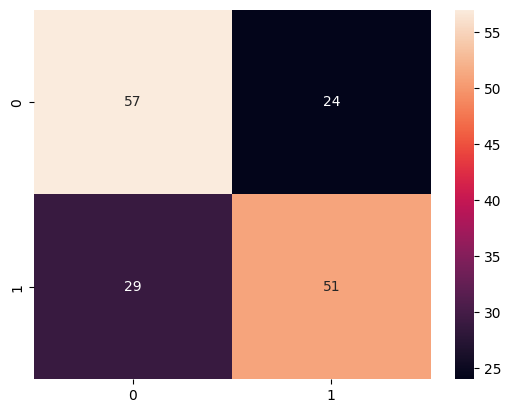

In [46]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.show()

In [47]:
accuracy_score(y_test,y_pred)

0.6708074534161491

In [48]:
print('Error Metrics\n\n', classification_report(y_test,y_pred))

Error Metrics

               precision    recall  f1-score   support

           0       0.66      0.70      0.68        81
           1       0.68      0.64      0.66        80

    accuracy                           0.67       161
   macro avg       0.67      0.67      0.67       161
weighted avg       0.67      0.67      0.67       161

